# hERG channel

Write about the hERG channel https://en.wikipedia.org/wiki/HERG

In [1]:
import utils
import matplotlib.pyplot as plt

In [2]:
utils.list_ode_models()

['tentusscher_noble_noble_panfilov_2006_c.ode',
 'tentusscher_2004_mcell_updated.ode',
 'paci_hyttinen_aaltosetala_severi_ventricularVersion.ode']

In [3]:
model_name = "tentusscher_noble_noble_panfilov_2006_c"

In [4]:
model = utils.load_model(model_name, rebuild=False)

Loaded ODE model 'tentusscher_noble_noble_panfilov_2006_c' with:
     Num full states: 17
      Num parameters: 46


In [5]:
dt = 1.0
t_start = 0.0
t_end = 1000.0

In [6]:
t, u = model.solve(t_start=t_start, t_end=t_end, dt=dt)

In [7]:
V_index = model.state_index("V")
print(V_index)

15


In [8]:
V = u[:, V_index]

<IPython.core.display.Javascript object>


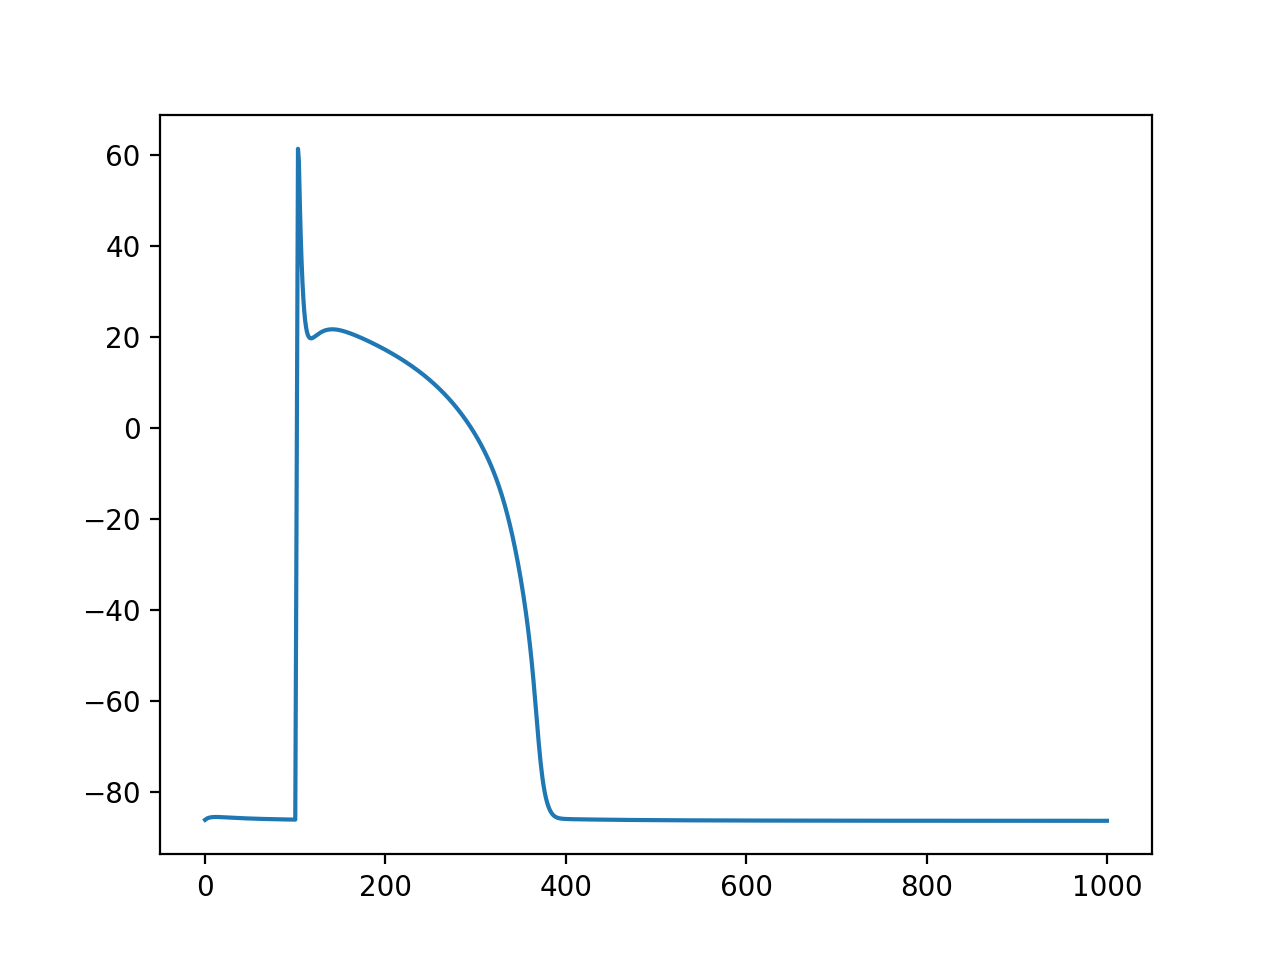

In [9]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(t, V)
plt.show()

In [10]:
# List all monitor names
# model.monitor_names()
parameters = model.default_parameters()
i_Kr = model.monitor_single("i_Kr", u, t, parameters)

<IPython.core.display.Javascript object>


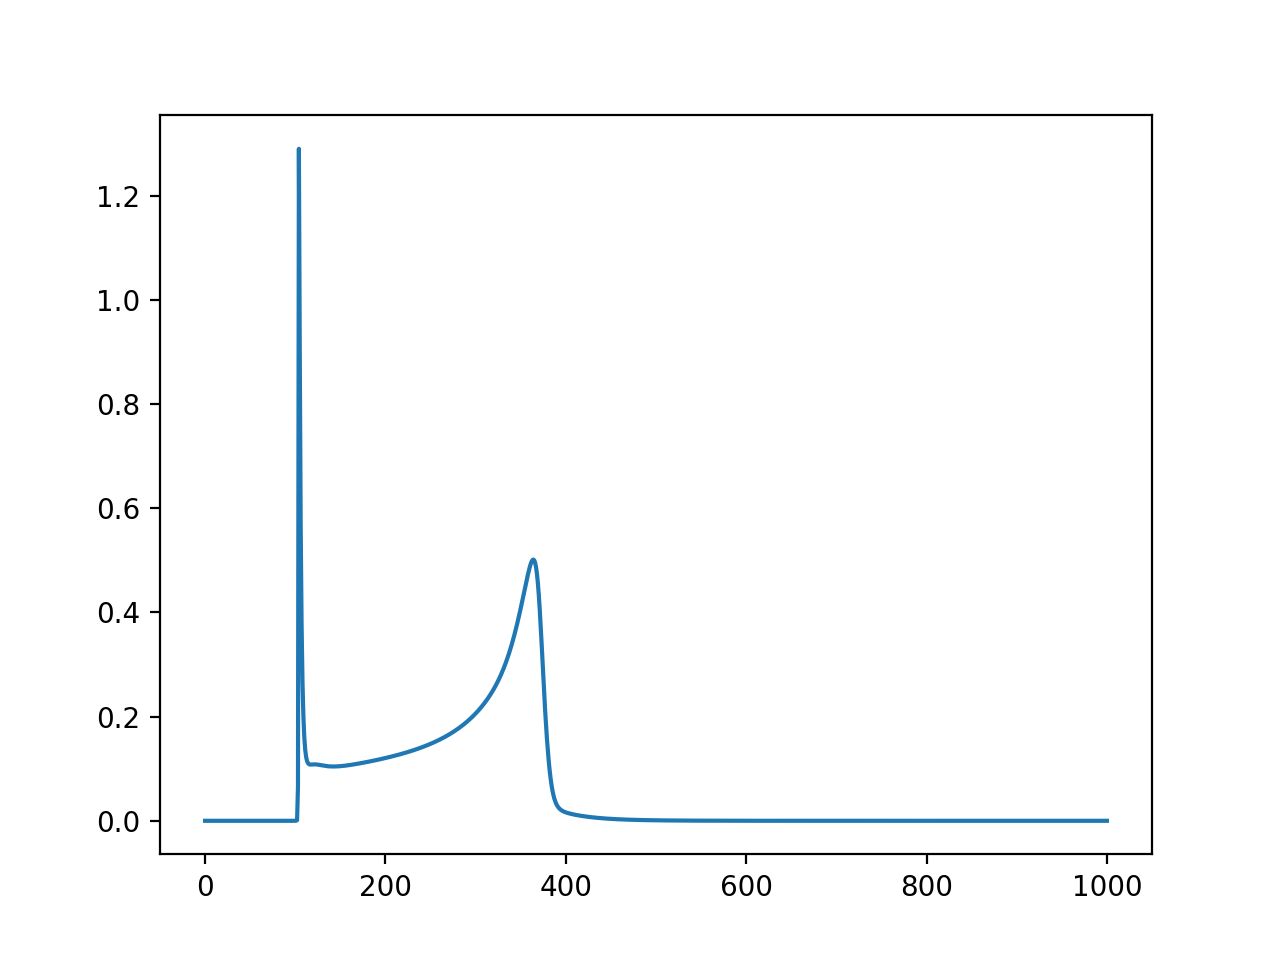

In [11]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(t, i_Kr)
plt.show()

In [12]:
parameters = model.default_parameters()
parameters["g_Kr"] *= 0.2
t2, u2 = model.solve(t_start=t_start, t_end=t_end, dt=dt, parameters=parameters)

Update paramameter g_Kr from 0.096 to 0.019200000000000002


In [13]:
V_kr_block = u2[:, V_index]

<IPython.core.display.Javascript object>


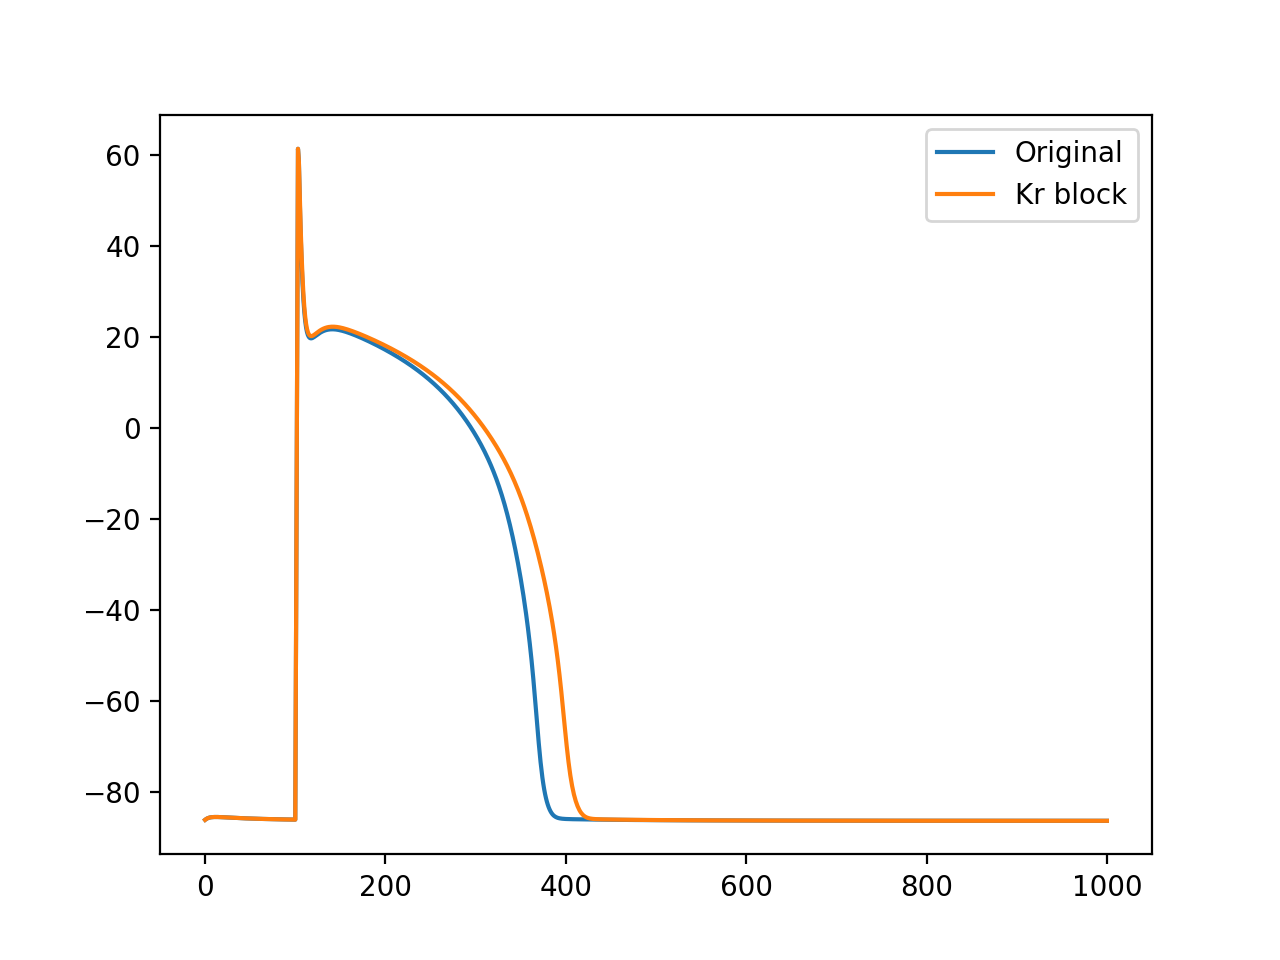

In [14]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(t, V, label="Original")
ax.plot(t2, V_kr_block, label="Kr block")
ax.legend(loc="best")
plt.show()

In [15]:
i_Kr_block = model.monitor_single("i_Kr", u, t, parameters=parameters)

<IPython.core.display.Javascript object>


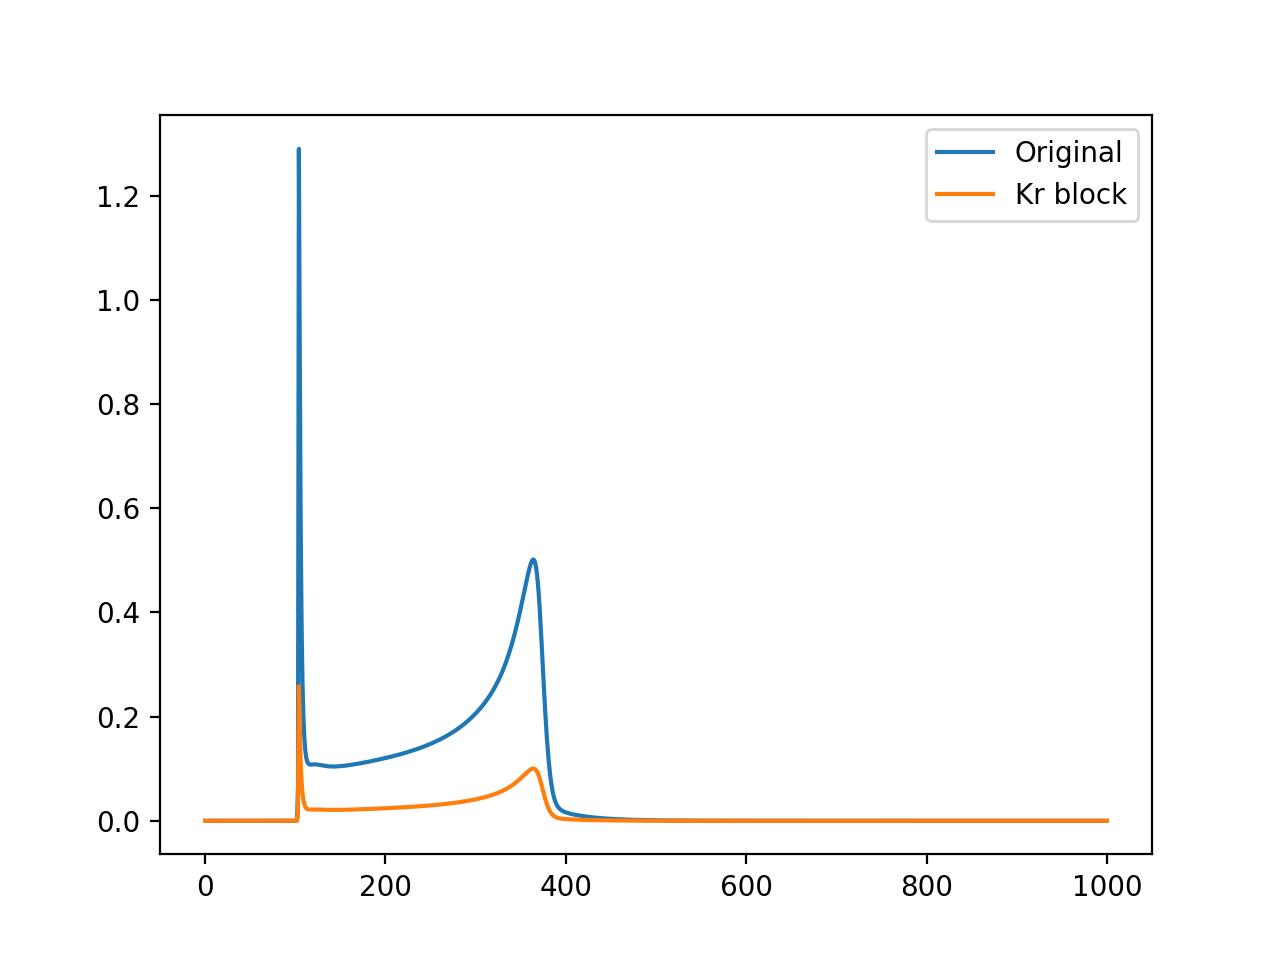

In [16]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(t, i_Kr, label="Original")
ax.plot(t2, i_Kr_block, label="Kr block")
ax.legend(loc="best")
plt.show()

In [17]:
import ipywidgets as widgets

<IPython.core.display.Javascript object>


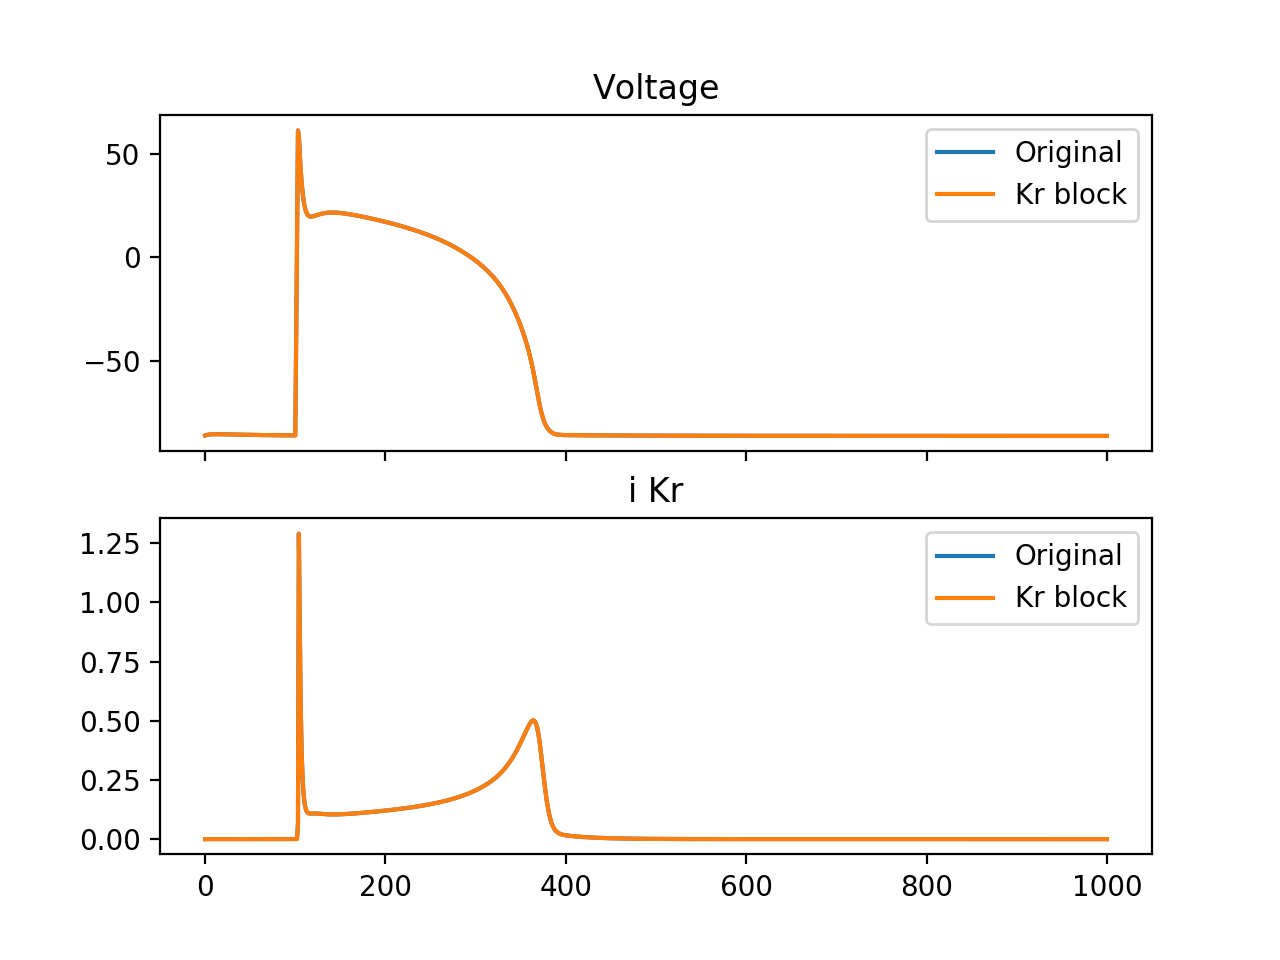

interactive(children=(FloatSlider(value=0.0, description='block', max=1.0, min=-1.0), Output()), _dom_classes=…

In [18]:
%matplotlib notebook
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, V, label="Original")
line_V, = ax[0].plot(t, V, label="Kr block")
ax[0].legend(loc="best")
ax[0].set_title("Voltage")
ax[1].plot(t, i_Kr, label="Original")
line_iKr, = ax[1].plot(t, i_Kr, label="Kr block")
ax[1].legend(loc="best")
ax[1].set_title("i Kr")
plt.show()

@widgets.interact(block=(-1, 1, 0.1))
def Kr_block(block):
    parameters = model.default_parameters().copy()
    parameters["g_Kr"] *= (1 + block)
    t2, u2 = model.solve(t_start=t_start, t_end=t_end, dt=dt, parameters=parameters)
    i_Kr_block = model.monitor_single("i_Kr", u2, t2, parameters=parameters)
    V_kr_block = u2[:, V_index]
    line_V.set_ydata(V_kr_block)
    line_iKr.set_ydata(i_Kr_block)
    fig.canvas.draw_idle()
 